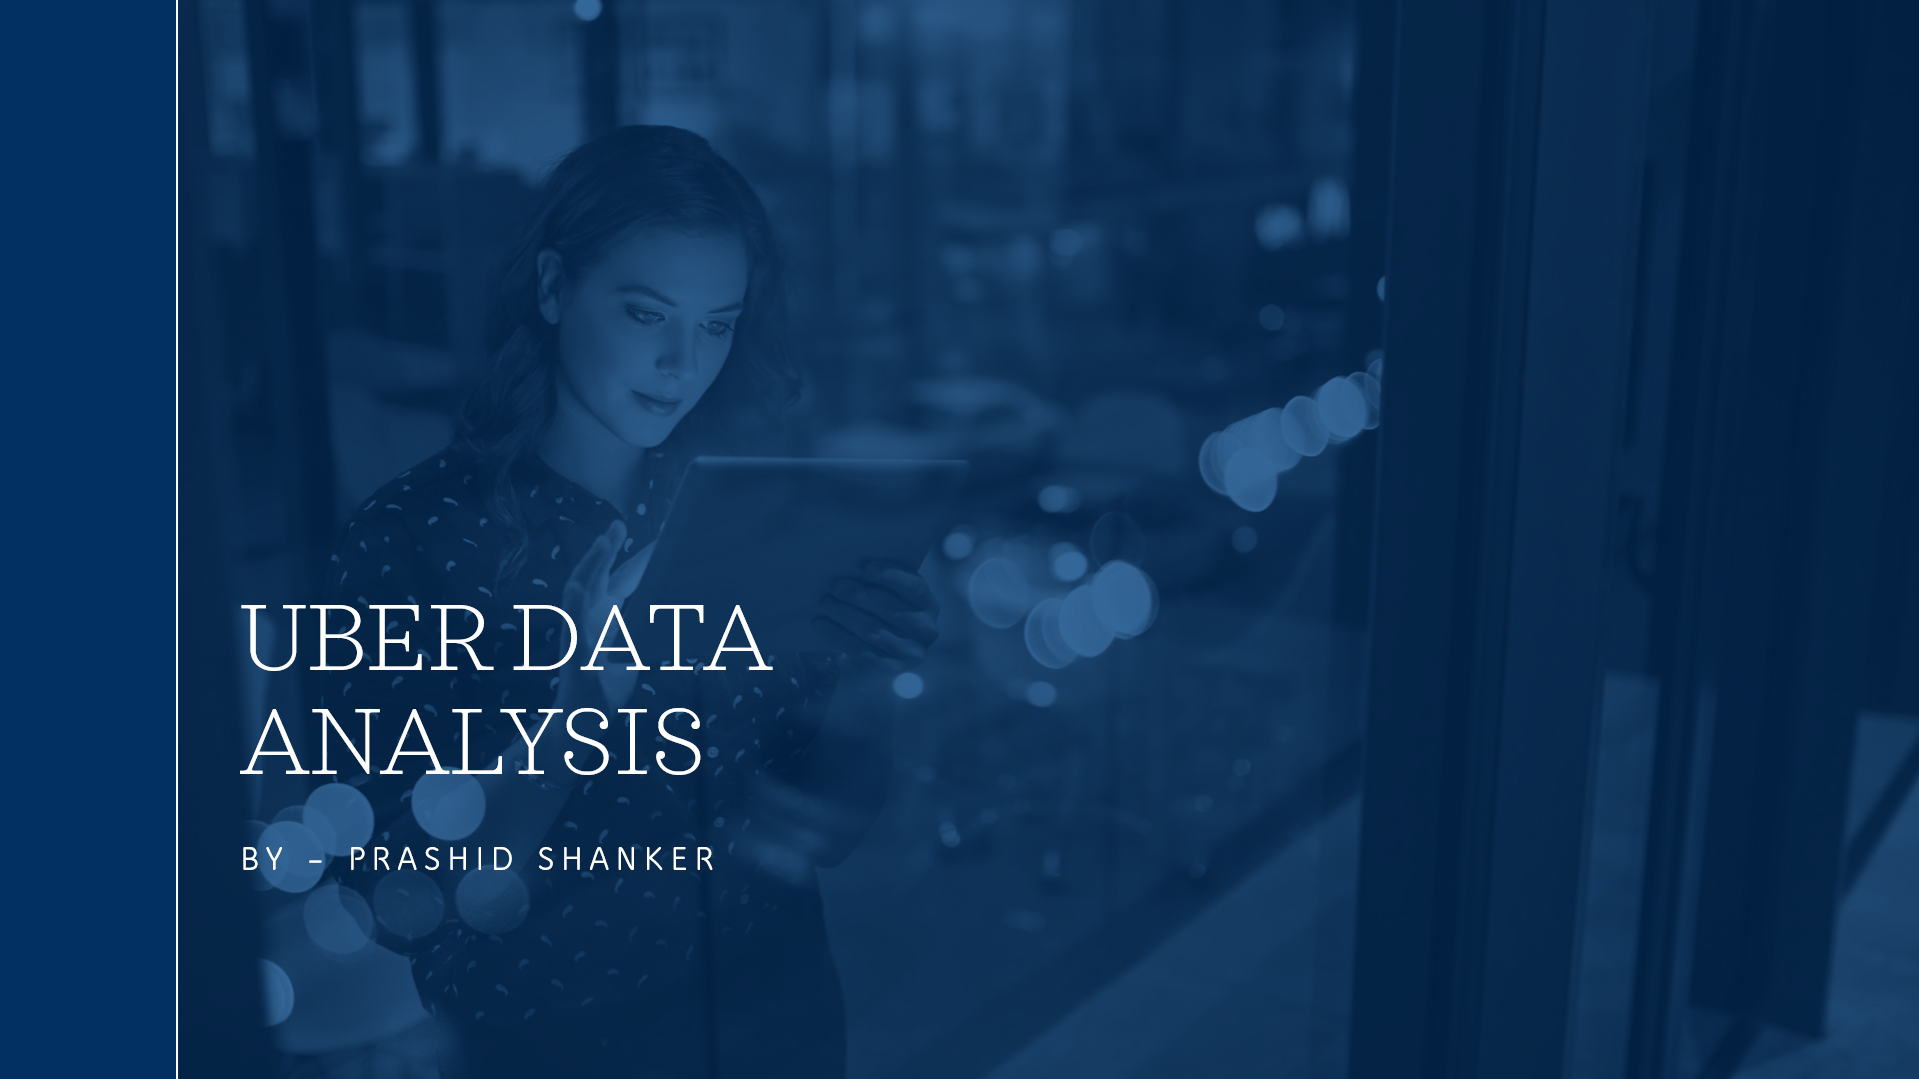

# UBER DATA ANALYSIS

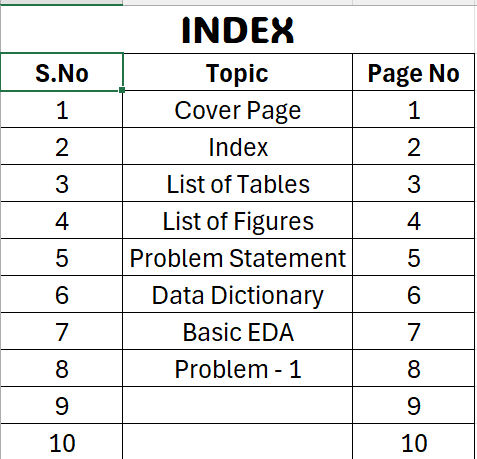

# List of Tables


# List of Figures

## Problem Statement / Objective

With the increasing popularity of ride-hailing services like Uber, understanding the factors influencing ride demand is crucial for optimizing operations and enhancing customer satisfaction. This project focuses on analyzing Uber pickup data in New York City to uncover patterns and correlations between ride demand and various factors such as time of day, day of the week, weather conditions, and seasonal trends. The goal is to provide actionable insights that can help Uber improve service efficiency, optimize driver availability, and enhance the overall customer experience.

## Data Description

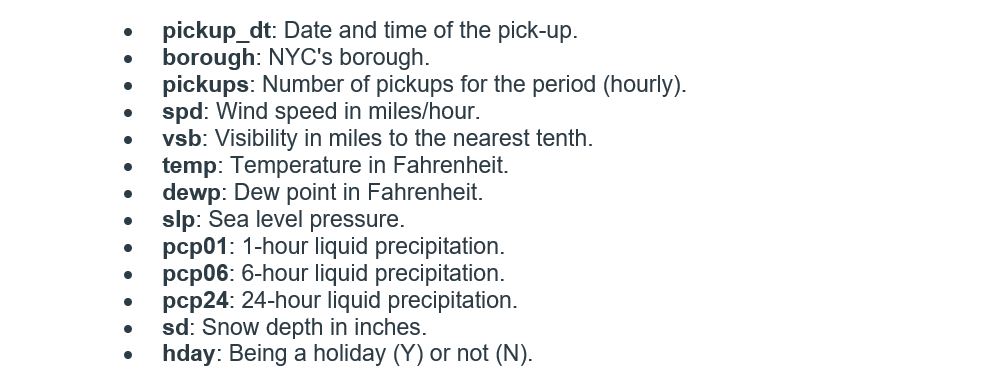

## Basic Steps

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('3-Uber_Data_New.csv')

### Display the top 5 rows

In [42]:
data.head().T

,0,1,2,3,4
pickup_dt,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00
borough,Bronx,Brooklyn,EWR,Manhattan,Queens
pickups,152.0,1519.0,0.0,5258.0,405.0
spd,5.0,5.0,5.0,5.0,5.0
vsb,10.0,10.0,10.0,10.0,10.0
temp,30.0,NaN,30.0,30.0,30.0
dewp,7.0,7.0,7.0,7.0,7.0
slp,1023.5,1023.5,1023.5,1023.5,1023.5
pcp01,0.0,0.0,0.0,0.0,0.0
pcp06,0.0,0.0,0.0,0.0,0.0


### Observation
**In the column hday there is a '?' which seems to be a wrong entry which is needed to be corrected**

### Display the last 5 rows

In [43]:
data.tail().T

,29096,29097,29098,29099,29100
pickup_dt,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00
borough,EWR,Manhattan,Queens,Staten Island,NaN
pickups,0.0,3828.0,580.0,0.0,3.0
spd,7.0,7.0,7.0,7.0,7.0
vsb,10.0,10.0,10.0,10.0,10.0
temp,75.0,75.0,75.0,75.0,75.0
dewp,65.0,65.0,65.0,65.0,65.0
slp,1011.8,1011.8,1011.8,1011.8,1011.8
pcp01,0.0,0.0,0.0,0.0,0.0
pcp06,0.0,0.0,0.0,0.0,0.0


### Check the shape of dataset

In [44]:
data.shape

(29101, 13)

### Check the datatypes of each feature

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


In [46]:
#data['pickup_dt','pickup_dt', 'borough', 'pickups', 'spd','vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'].dtypes

### Check the Statistical summary 

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29099.0,490.236022,995.680628,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900262,19.800541,0.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1052.633123,5945.147362,1.0,1012.5,1018.2,1022.900000,1015200.00
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


### Check the null value

In [48]:
data.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [49]:
data.isnull().sum().sum()


3404

In [50]:
data['temp'].head(10)

0    30.0
1     NaN
2    30.0
3    30.0
4    30.0
5    30.0
6    30.0
7    30.0
8     NaN
9    30.0
Name: temp, dtype: float64

In [51]:
data['borough'].head(10)

0            Bronx
1         Brooklyn
2              EWR
3        Manhattan
4           Queens
5    Staten Island
6              NaN
7            Bronx
8         Brooklyn
9              EWR
Name: borough, dtype: object

### Check the duplicate values

In [52]:
data.duplicated().sum()


0

### Check the outliers and their authenticity

<Axes: xlabel='dewp'>

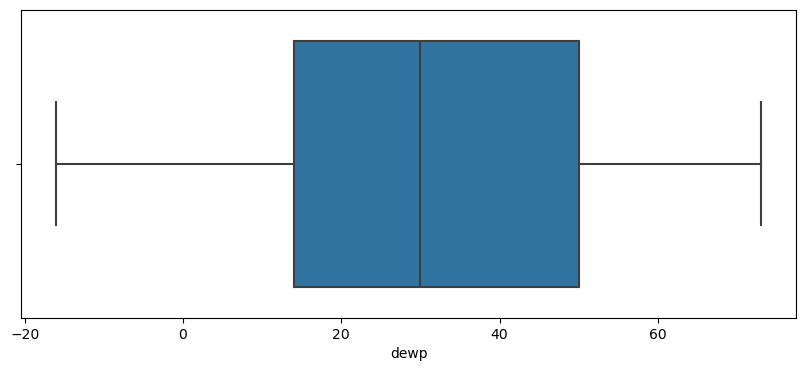

In [53]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'dewp')

<Axes: xlabel='slp'>

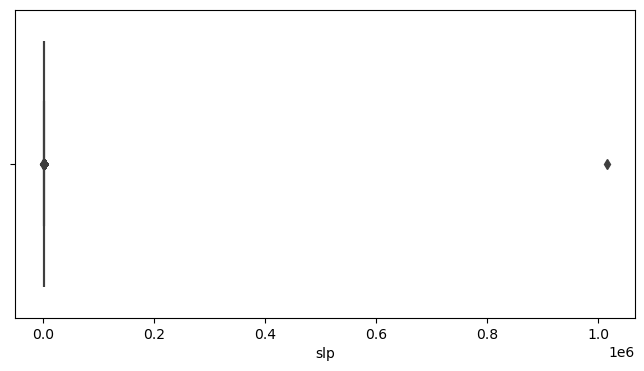

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'slp')

<Axes: xlabel='pickups'>

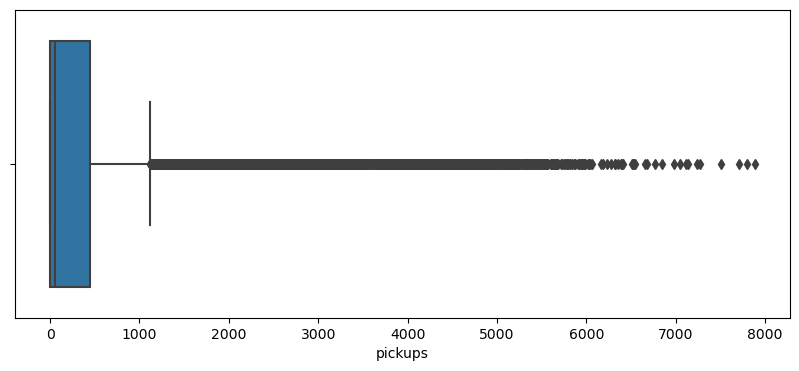

In [55]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pickups')

<Axes: xlabel='temp'>

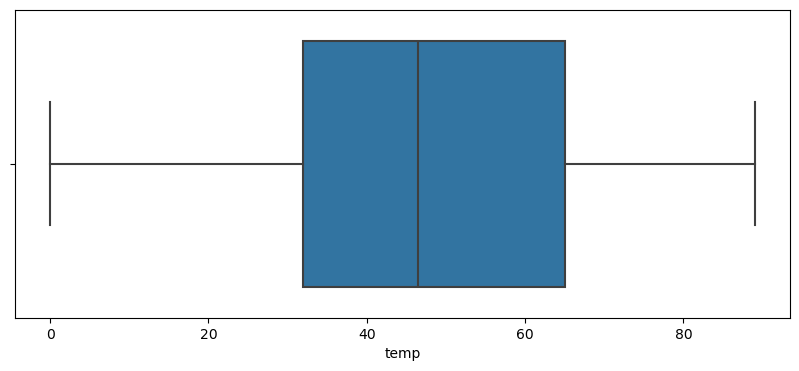

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'temp')

<Axes: xlabel='spd'>

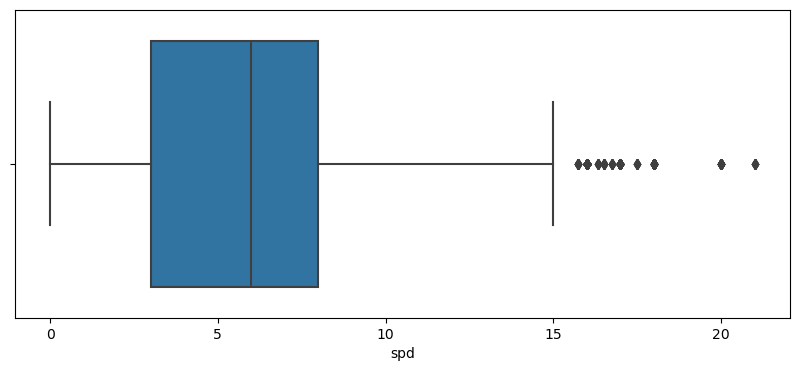

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'spd')

<Axes: xlabel='vsb'>

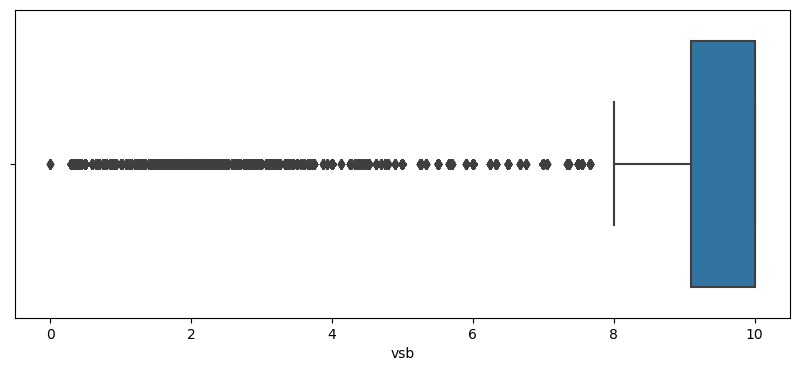

In [58]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'vsb')

<Axes: xlabel='pcp01'>

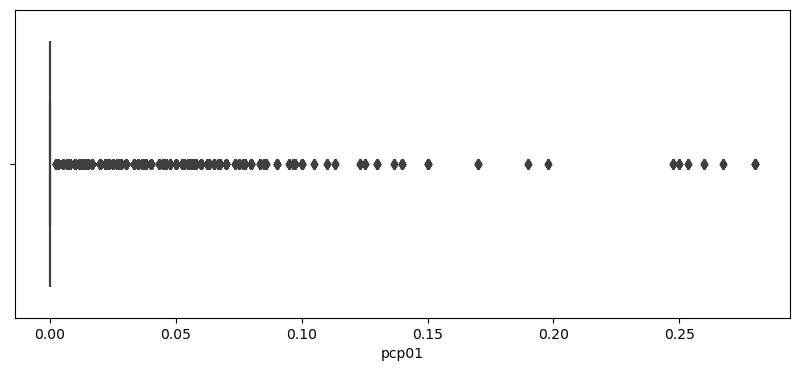

In [59]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp01')

<Axes: xlabel='pcp06'>

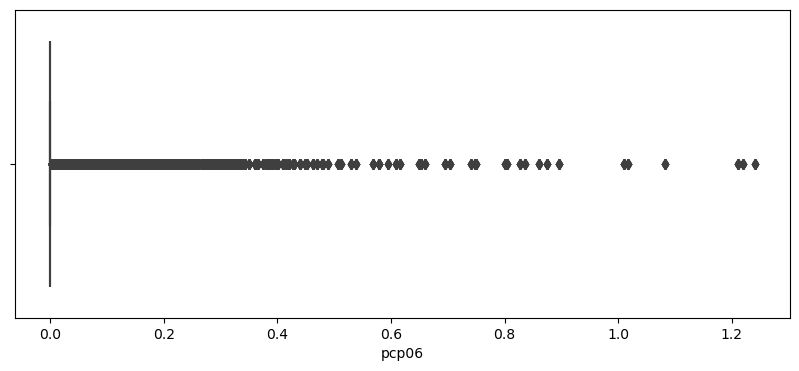

In [60]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp06')

<Axes: xlabel='pcp24'>

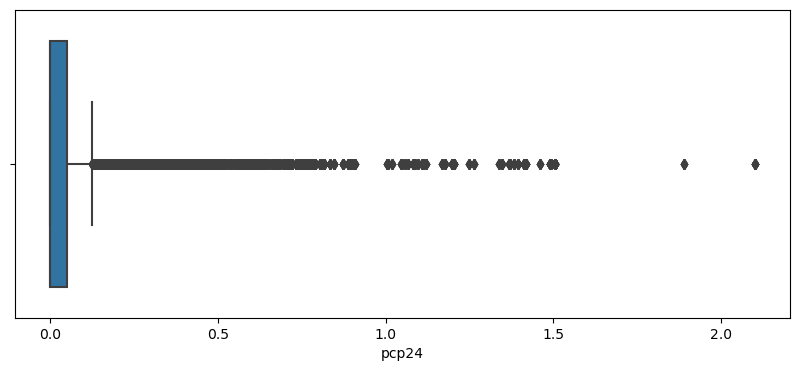

In [61]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'pcp24')

<Axes: xlabel='sd'>

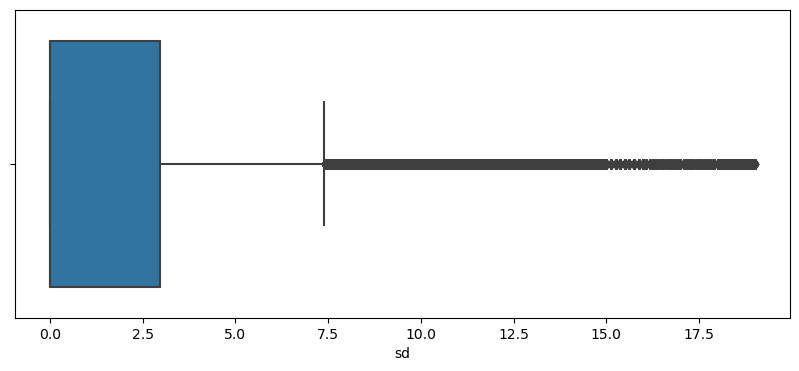

In [62]:
plt.figure(figsize=(10,4))
sns.boxplot(data = data, x = 'sd')

### Check the anomalies or wrong entries.

In [63]:
data['hday'].value_counts()

hday
N    27980
Y     1119
?        2
Name: count, dtype: int64

In [64]:
data[data['hday']=='?']

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
123,1/1/2015 19:00,Queens,238.0,7.0,10.0,37.0,7.0,1016.2,0.0,0.0,0.0,0.0,?


In [65]:
data['hday'] = data['hday'].replace('?', np.nan)

In [66]:
mean1=data['temp'].mean()
data['temp'].replace(np.nan,median1,inplace=True)

NameError: name 'median1' is not defined

In [ ]:
data['temp'].isnull().sum()

In [ ]:
mode1=data['borough'].mode().values[0]
data['borough']=data['borough'].replace(np.nan,mode1)

In [ ]:
data['borough'].isnull().sum()

In [ ]:
data.isnull().sum()

In [ ]:
median1=data['pickups'].median()
data['pickups'].replace(np.nan,median1,inplace=True)
data['pickups'].isnull().sum()

In [67]:
mode2=data['hday'].mode().values[0]
data['hday']=data['hday'].replace(np.nan,mode1)
data['hday'].isnull().sum()

NameError: name 'mode1' is not defined

In [68]:
data.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            2
dtype: int64

In [69]:
def remove_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lwr_range=q1-(1.5 * iqr)
    upr_range=q3+(1.5 * iqr)
    return lwr_range, upr_range

In [70]:
for i in data.columns:
    if data[i].dtype != 'object':
        lr,ur = remove_outliers(data[i])
        data[i]=np.where(data[i]>ur, ur,data[i])
        data[i]=np.where(data[i]<lr,lr,data[i])

# 1. Pickup Analysis

### What is the total number of Uber pickups across all boroughs?

In [71]:
total_pickups = data['pickups'].sum()

In [72]:
total_pickups

8207691.0

### Which borough has the highest average number of hourly pickups?

In [73]:
avg_pickups_borough = data.groupby('borough')['pickups'].mean().idxmax()

In [74]:
avg_pickups_borough

'Manhattan'

### How do the number of pickups vary across different hours of the day?

# Which day of the week has the highest number of pickups?

# 2.  Weather Impact

###  What is the correlation between temperature and the number of pickups?

In [75]:
correlation_temp_pickups = data['temp'].corr(data['pickups'])
print(f"Correlation between temperature and number of pickups: {correlation_temp_pickups}")


Correlation between temperature and number of pickups: 0.06851304320789024


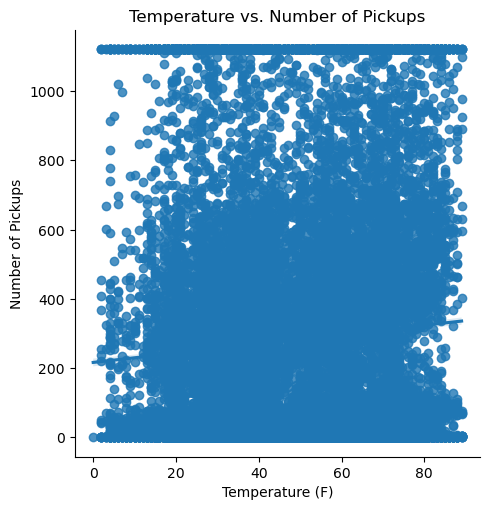

In [76]:
# Scatter plot with regression line
sns.lmplot(x='temp', y='pickups', data=data)
plt.title('Temperature vs. Number of Pickups')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Pickups')
plt.show()

### How does visibility impact the number of pickups?

Correlation between visibility and number of pickups: -0.007474433707060333


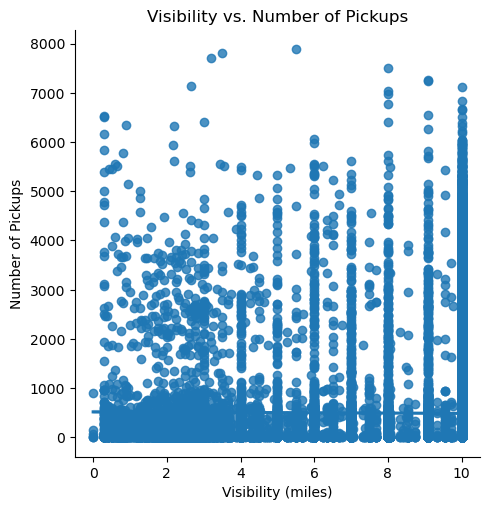

In [30]:
# Calculate the correlation
correlation_vsb_pickups = data['vsb'].corr(data['pickups'])
print(f"Correlation between visibility and number of pickups: {correlation_vsb_pickups}")

# Scatter plot with regression line
sns.lmplot(x='vsb', y='pickups', data=data)
plt.title('Visibility vs. Number of Pickups')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Pickups')
plt.show()


### Is there a relationship between wind speed and the number of pickups?

Correlation between wind speed and number of pickups: 0.011110156997631699


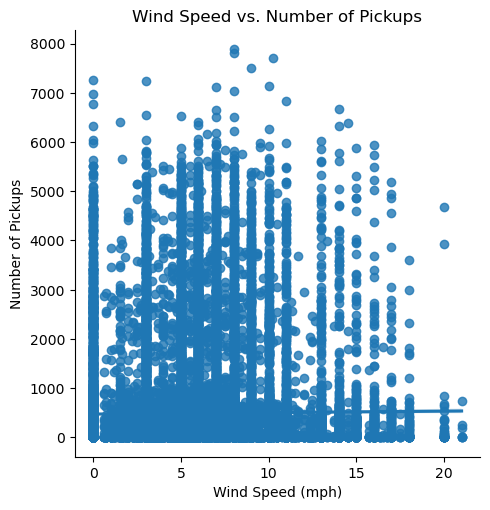

In [31]:
# Calculate the correlation
correlation_spd_pickups = data['spd'].corr(data['pickups'])
print(f"Correlation between wind speed and number of pickups: {correlation_spd_pickups}")

# Scatter plot with regression line
sns.lmplot(x='spd', y='pickups', data=data)
plt.title('Wind Speed vs. Number of Pickups')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Number of Pickups')
plt.show()


### How does precipitation (1-hour, 6-hour, 24-hour) affect the number of pickups?

Correlation between 1-hour precipitation and number of pickups: nan
Correlation between 6-hour precipitation and number of pickups: nan
Correlation between 24-hour precipitation and number of pickups: -0.01664088365561575


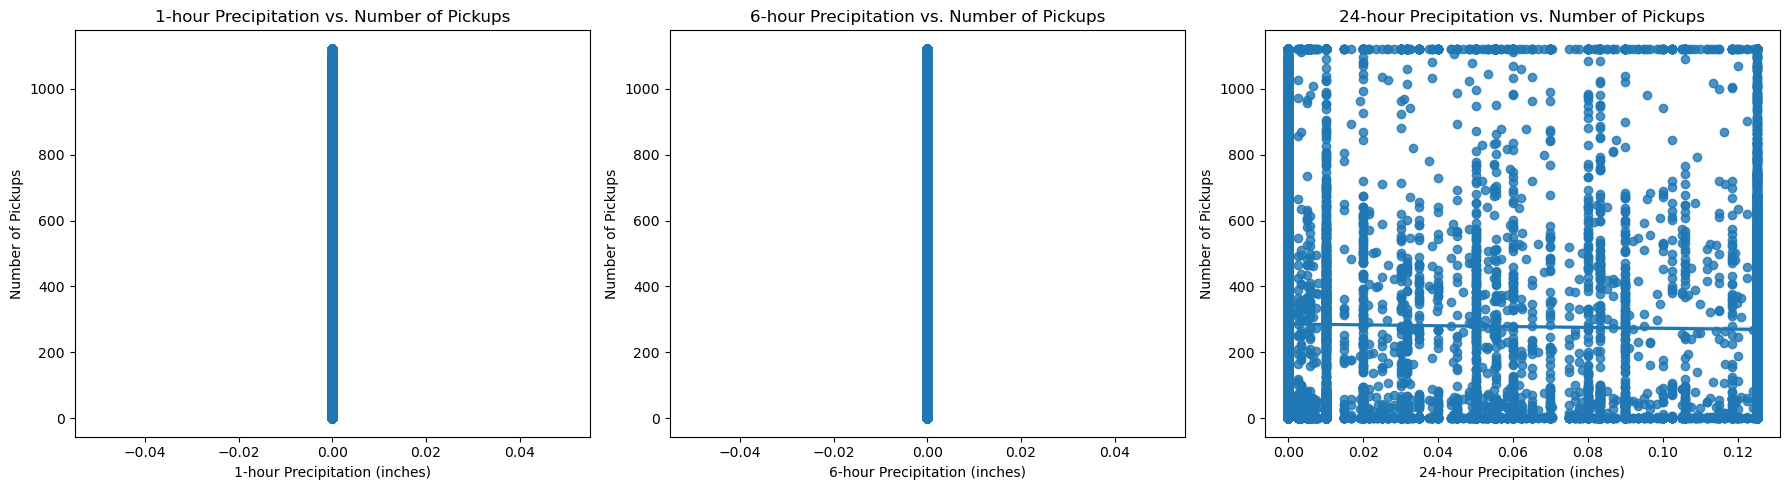

In [115]:
correlation_pcp01_pickups = data['pcp01'].corr(data['pickups'])
correlation_pcp06_pickups = data['pcp06'].corr(data['pickups'])
correlation_pcp24_pickups = data['pcp24'].corr(data['pickups'])

print(f"Correlation between 1-hour precipitation and number of pickups: {correlation_pcp01_pickups}")
print(f"Correlation between 6-hour precipitation and number of pickups: {correlation_pcp06_pickups}")
print(f"Correlation between 24-hour precipitation and number of pickups: {correlation_pcp24_pickups}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot using sns.regplot
sns.regplot(x='pcp01', y='pickups', data=data, ax=axes[0])
axes[0].set_title('1-hour Precipitation vs. Number of Pickups')
axes[0].set_xlabel('1-hour Precipitation (inches)')
axes[0].set_ylabel('Number of Pickups')

sns.regplot(x='pcp06', y='pickups', data=data, ax=axes[1])
axes[1].set_title('6-hour Precipitation vs. Number of Pickups')
axes[1].set_xlabel('6-hour Precipitation (inches)')
axes[1].set_ylabel('Number of Pickups')

sns.regplot(x='pcp24', y='pickups', data=data, ax=axes[2])
axes[2].set_title('24-hour Precipitation vs. Number of Pickups')
axes[2].set_xlabel('24-hour Precipitation (inches)')
axes[2].set_ylabel('Number of Pickups')

plt.tight_layout()
plt.show()

# 3.	Seasonal Trends

### How do the number of pickups vary across different seasons (winter, spring, summer, fall)?

### What is the average number of pickups during holidays compared to non-holidays?

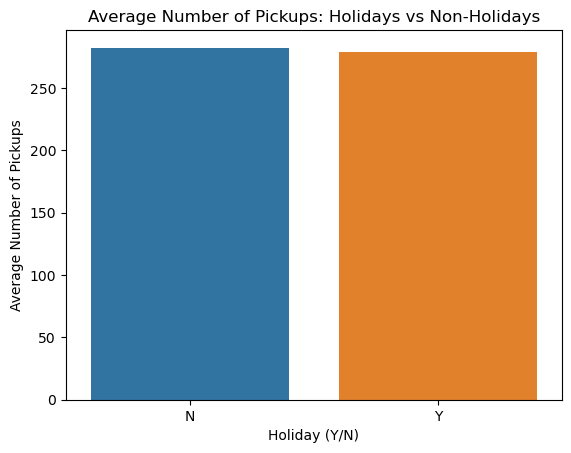

In [78]:
holiday_pickups = data.groupby('hday')['pickups'].mean().reset_index()

# Plot
sns.barplot(x='hday', y='pickups', data=holiday_pickups)
plt.title('Average Number of Pickups: Holidays vs Non-Holidays')
plt.xlabel('Holiday (Y/N)')
plt.ylabel('Average Number of Pickups')
plt.show()

### How does snow depth influence the number of pickups?

Correlation between snow depth and number of pickups: -0.025384465503118812


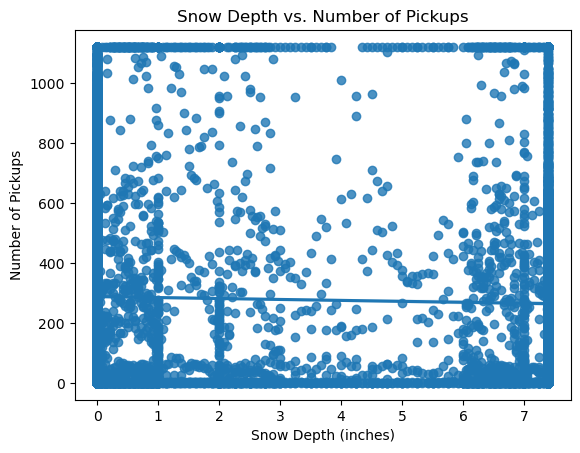

In [79]:
# Calculate the correlation
correlation_sd_pickups = data['sd'].corr(data['pickups'])
print(f"Correlation between snow depth and number of pickups: {correlation_sd_pickups}")

# Scatter plot with regression line
sns.regplot(x='sd', y='pickups', data=data)
plt.title('Snow Depth vs. Number of Pickups')
plt.xlabel('Snow Depth (inches)')
plt.ylabel('Number of Pickups')
plt.show()


# 4.	Hourly Trends

### What are the peak hours for Uber pickups in each borough?

D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

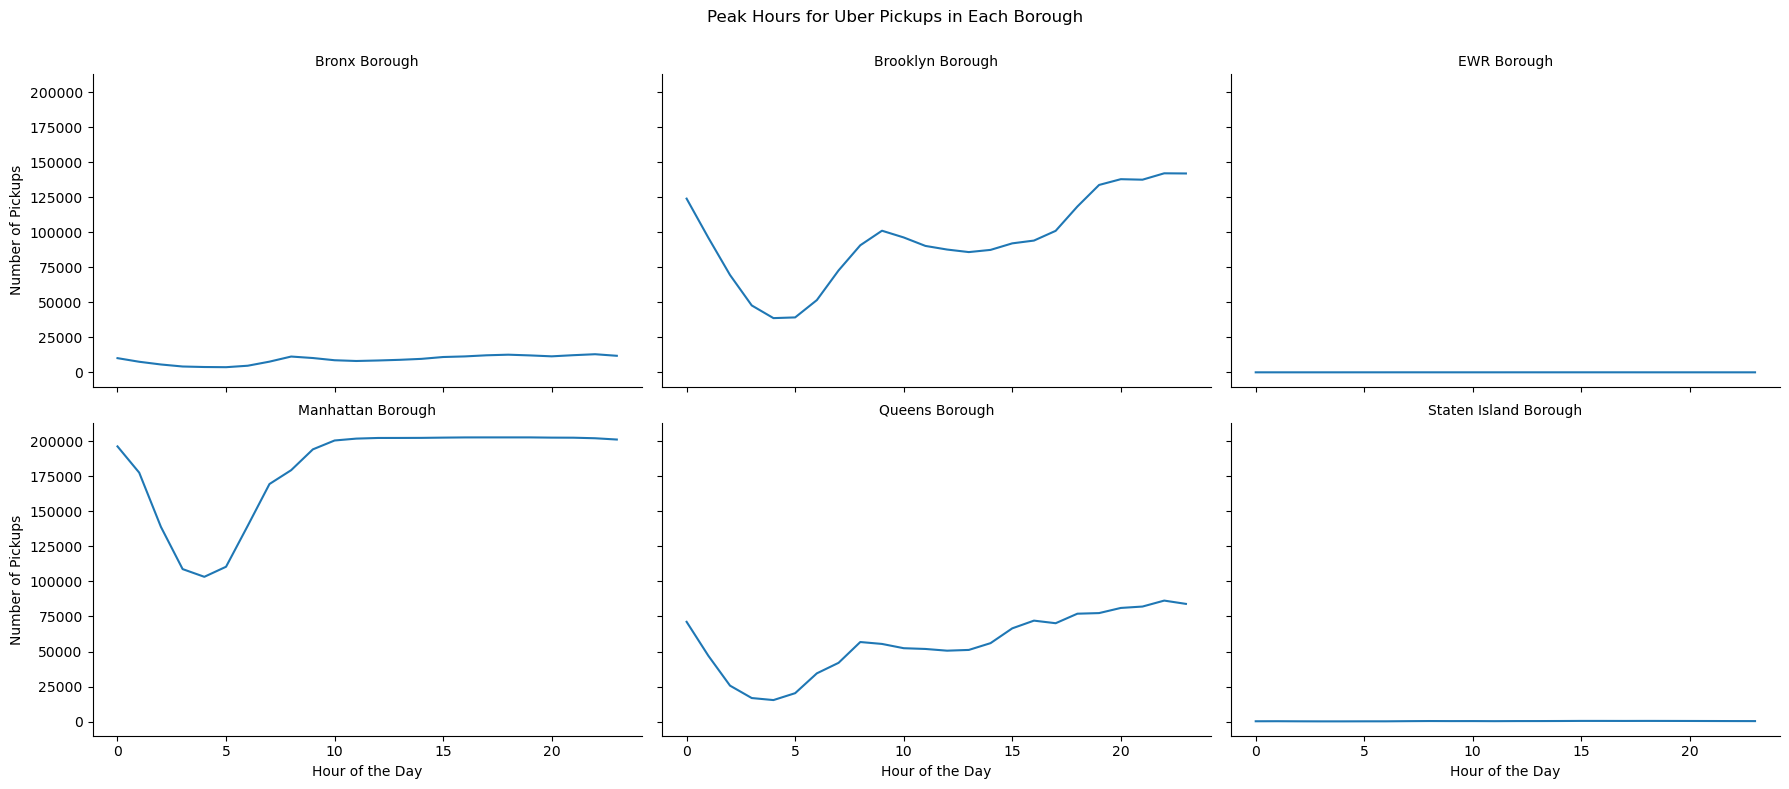

In [88]:
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'], format='%m/%d/%Y %H:%M')

# Extract hour from pickup_dt
data['hour'] = data['pickup_dt'].dt.hour

# Group by borough and hour, then calculate the sum of pickups
hourly_pickups = data.groupby(['borough', 'hour'])['pickups'].sum().reset_index()

# Plot
g = sns.FacetGrid(hourly_pickups, col="borough", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'hour', 'pickups')
g.set_axis_labels("Hour of the Day", "Number of Pickups")
g.set_titles("{col_name} Borough")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Peak Hours for Uber Pickups in Each Borough')
plt.show()


### How do the number of pickups change during rush hours (e.g., 7-9 AM, 5-7 PM)?

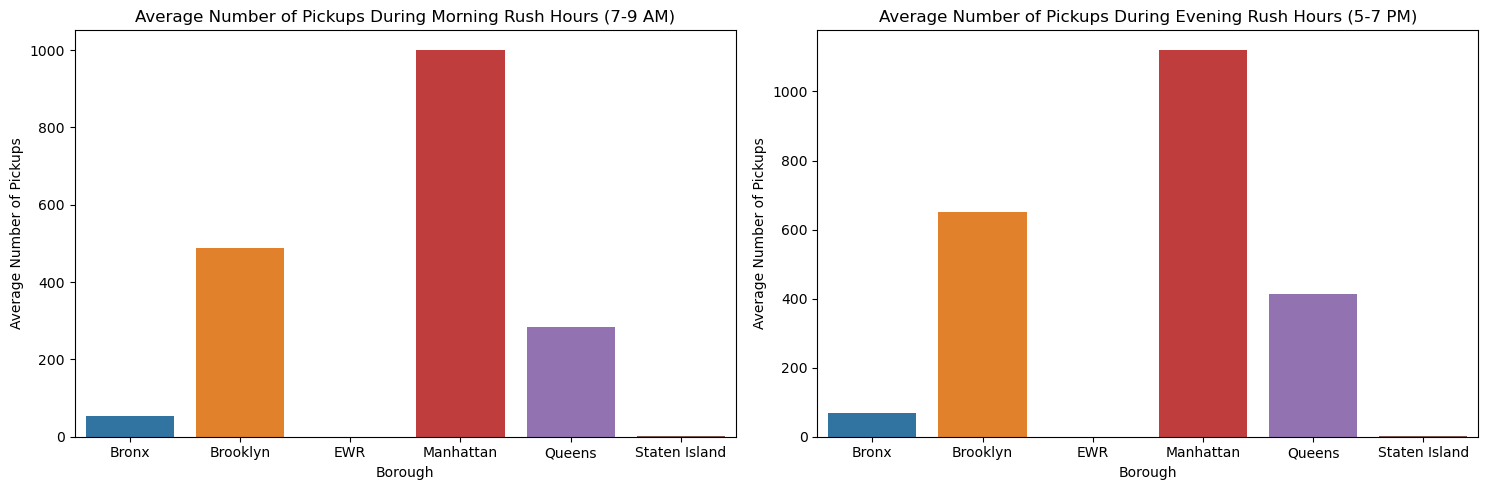

In [89]:
# Define rush hours
morning_rush_hours = [7, 8, 9]
evening_rush_hours = [17, 18, 19]

# Filter data for rush hours
morning_rush_data = data[data['hour'].isin(morning_rush_hours)]
evening_rush_data = data[data['hour'].isin(evening_rush_hours)]

# Group by borough and calculate the average number of pickups during rush hours
morning_rush_avg = morning_rush_data.groupby('borough')['pickups'].mean().reset_index()
evening_rush_avg = evening_rush_data.groupby('borough')['pickups'].mean().reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='borough', y='pickups', data=morning_rush_avg, ax=axes[0])
axes[0].set_title('Average Number of Pickups During Morning Rush Hours (7-9 AM)')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Average Number of Pickups')

sns.barplot(x='borough', y='pickups', data=evening_rush_avg, ax=axes[1])
axes[1].set_title('Average Number of Pickups During Evening Rush Hours (5-7 PM)')
axes[1].set_xlabel('Borough')
axes[1].set_ylabel('Average Number of Pickups')

plt.tight_layout()
plt.show()


### What is the average number of pickups during late-night hours (e.g., 12 AM - 4 AM)?

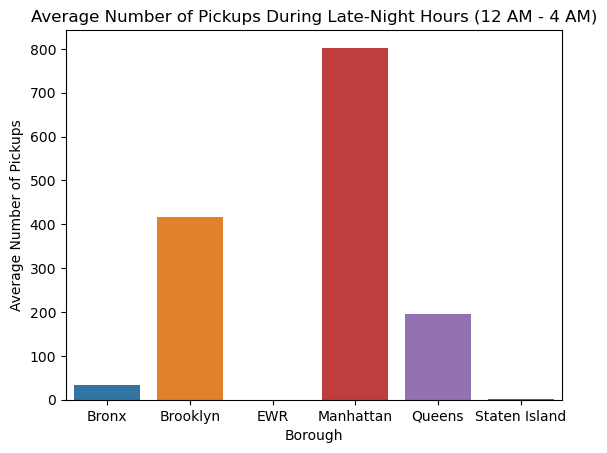

In [90]:
# Define late-night hours
late_night_hours = [0, 1, 2, 3, 4]

# Filter data for late-night hours
late_night_data = data[data['hour'].isin(late_night_hours)]

# Group by borough and calculate the average number of pickups during late-night hours
late_night_avg = late_night_data.groupby('borough')['pickups'].mean().reset_index()

# Plot
sns.barplot(x='borough', y='pickups', data=late_night_avg)
plt.title('Average Number of Pickups During Late-Night Hours (12 AM - 4 AM)')
plt.xlabel('Borough')
plt.ylabel('Average Number of Pickups')
plt.show()


# 6.	Borough Comparison

### How do pickup trends differ between boroughs during different weather conditions?

C:\Users\Prashid shanker\AppData\Local\Temp\ipykernel_19388\492861216.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pickup_trends = data.groupby(['borough', temperature_bins])['pickups'].mean().unstack()


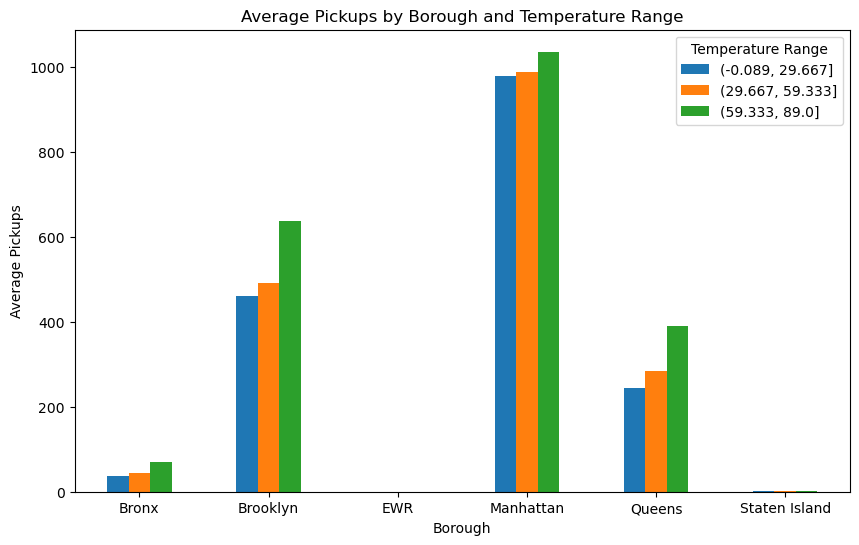

In [91]:
# Example: Group by borough and temperature range
temperature_bins = pd.cut(data['temp'], bins=3)  # Example: Divide temperature into 3 bins
pickup_trends = data.groupby(['borough', temperature_bins])['pickups'].mean().unstack()

# Plotting
pickup_trends.plot(kind='bar', figsize=(10, 6), title='Average Pickups by Borough and Temperature Range')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')
plt.xticks(rotation=0)
plt.legend(title='Temperature Range')
plt.show()


### Which borough shows the highest increase in pickups during holidays?

In [92]:
# Calculate average pickups during holidays and non-holidays for each borough
holiday_pickups = data.groupby(['borough', 'hday'])['pickups'].mean().unstack()

# Calculate percentage increase during holidays
holiday_pickups['Increase'] = (holiday_pickups['Y'] - holiday_pickups['N']) / holiday_pickups['N'] * 100

# Find borough with highest increase
borough_with_highest_increase = holiday_pickups['Increase'].idxmax()
highest_increase_percentage = holiday_pickups['Increase'].max()

print(f"Borough with highest increase in pickups during holidays: {borough_with_highest_increase}")
print(f"Highest increase percentage: {highest_increase_percentage:.2f}%")


Borough with highest increase in pickups during holidays: EWR
Highest increase percentage: 78.61%


### How does the number of pickups compare between weekdays and weekends for each borough?

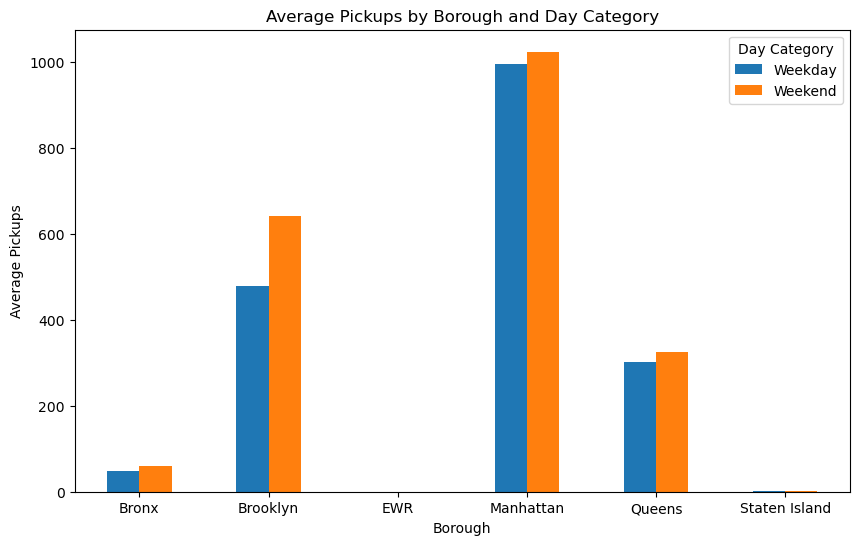

In [116]:
# Create a new column for day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['pickup_dt'].dt.dayofweek

# Define weekdays and weekends
data['day_category'] = np.where(data['day_of_week'] < 5, 'Weekday', 'Weekend')

# Group by borough and day category
weekday_weekend_pickups = data.groupby(['borough', 'day_category'])['pickups'].mean().unstack()

# Plotting
weekday_weekend_pickups.plot(kind='bar', figsize=(10, 6), title='Average Pickups by Borough and Day Category')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')
plt.xticks(rotation=0)
plt.legend(title='Day Category')
plt.show()


# 7.	Weather Extremes


### How do extreme weather conditions (e.g., very high or very low temperatures, heavy rainfall, snowstorms) affect the number of pickups?


C:\Users\Prashid shanker\AppData\Local\Temp\ipykernel_19388\3924339005.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_pickups = data.groupby('temp_category')['pickups'].mean()


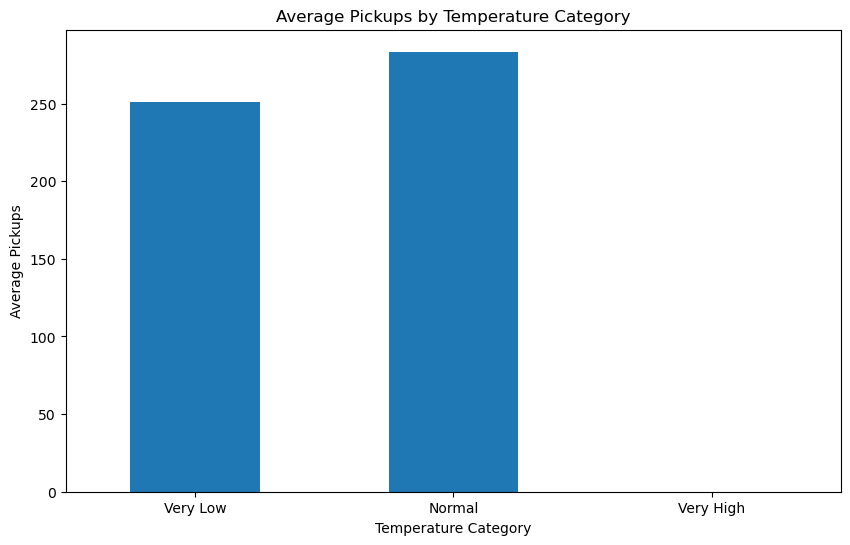

In [99]:
# Example: Impact of extreme temperatures on pickups

# Define extreme temperature thresholds
very_high_temp = 90  # Example threshold for very high temperature (Fahrenheit)
very_low_temp = 20   # Example threshold for very low temperature (Fahrenheit)

# Create categories for extreme temperatures
data['temp_category'] = pd.cut(data['temp'], bins=[-np.inf, very_low_temp, very_high_temp, np.inf],
                               labels=['Very Low', 'Normal', 'Very High'])

# Group by temperature category and calculate average pickups
temperature_pickups = data.groupby('temp_category')['pickups'].mean()

# Plotting
temperature_pickups.plot(kind='bar', figsize=(10, 6), title='Average Pickups by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Pickups')
plt.xticks(rotation=0)
plt.show()


### What is the impact of visibility less than 1 mile on the number of pickups?

Average pickups during visibility less than 1 mile: nan


IndexError: index 0 is out of bounds for axis 0 with size 0

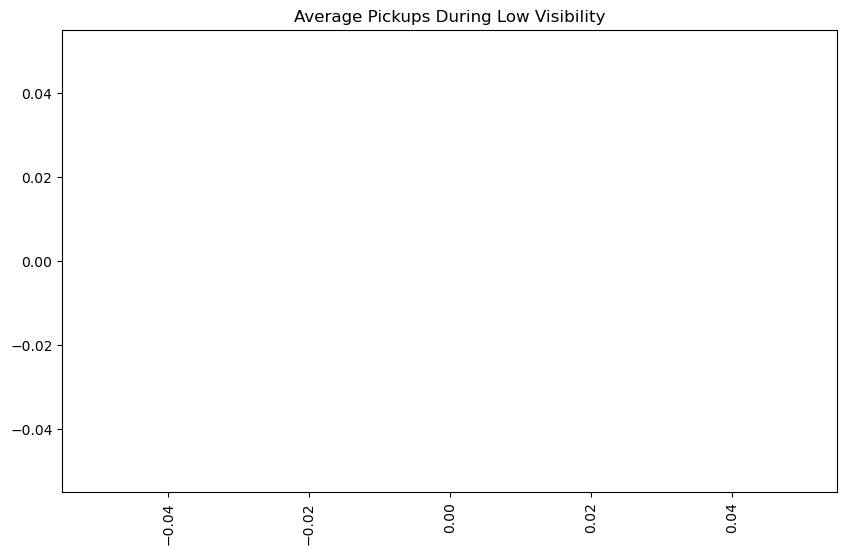

In [100]:
# Subset data where visibility is less than 1 mile
low_visibility_data = data[data['vsb'] < 1]

# Calculate average pickups during low visibility
average_pickups_low_visibility = low_visibility_data['pickups'].mean()

print(f"Average pickups during visibility less than 1 mile: {average_pickups_low_visibility:.2f}")

# Optional: Group by borough to see how low visibility affects each borough differently
borough_visibility_pickups = low_visibility_data.groupby('borough')['pickups'].mean()

# Plotting
borough_visibility_pickups.plot(kind='bar', figsize=(10, 6), title='Average Pickups During Low Visibility')
plt.xlabel('Borough')
plt.ylabel('Average Pickups')
plt.xticks(rotation=0)
plt.show()


# 8.	Data Correlations

### Is there a correlation between sea level pressure and the number of pickups?

In [101]:
# Calculate Pearson correlation coefficient between slp and pickups
correlation_coefficient = data['slp'].corr(data['pickups'])

print(f"Pearson correlation coefficient between sea level pressure and pickups: {correlation_coefficient:.2f}")


Pearson correlation coefficient between sea level pressure and pickups: -0.01


### How do different weather variables (temperature, dew point, wind speed, visibility) collectively impact the number of pickups?

In [102]:
# Calculate correlations between weather variables and pickups
weather_variables = ['temp', 'dewp', 'spd', 'vsb']
correlations = {}
for var in weather_variables:
    correlations[var] = data[var].corr(data['pickups'])

# Print correlations
for var, corr in correlations.items():
    print(f"Pearson correlation coefficient between {var} and pickups: {corr:.2f}")


Pearson correlation coefficient between temp and pickups: 0.07
Pearson correlation coefficient between dewp and pickups: 0.05
Pearson correlation coefficient between spd and pickups: -0.01
Pearson correlation coefficient between vsb and pickups: -0.00


### What is the relationship between holiday status and weather conditions on the number of pickups?

In [105]:
# Group by holiday status and calculate average pickups
holiday_pickups = data.groupby('hday')['pickups'].mean()

print("Average pickups:")
print(holiday_pickups)

# Compare weather variables for holidays vs non-holidays
weather_stats = data.groupby('hday')[['temp', 'dewp', 'spd', 'vsb']].mean()

print("\nWeather statistics:")
print(weather_stats)


Average pickups:
hday
N    282.152252
Y    279.061773
Name: pickups, dtype: float64

Weather statistics:
           temp       dewp       spd       vsb
hday                                          
N     48.005918  30.857505  5.967493  9.486840
Y     45.247706  30.004483  5.823801  9.505071


# 9.	Growth Insights


### Which weather conditions are most favorable for Uber pickups, and how can this information be used to optimize driver availability?

C:\Users\Prashid shanker\AppData\Local\Temp\ipykernel_19388\3608040640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_pickups_by_temp = data.groupby('temp_category')['pickups'].mean()


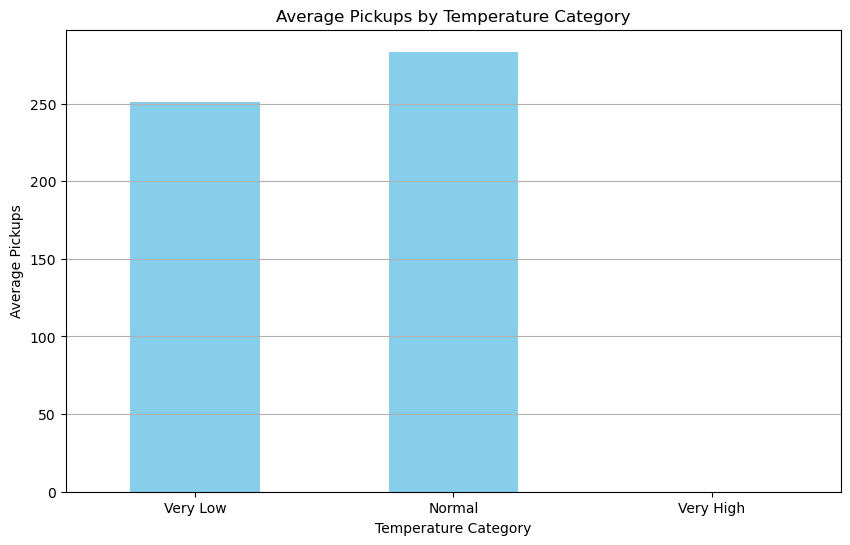

In [108]:
average_pickups_by_temp = data.groupby('temp_category')['pickups'].mean()

# Plotting average pickups by temperature category
plt.figure(figsize=(10, 6))
average_pickups_by_temp.plot(kind='bar', color='skyblue')
plt.title('Average Pickups by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




### Based on the data, what recommendations can be made to Uber to increase pickups during low-demand periods?

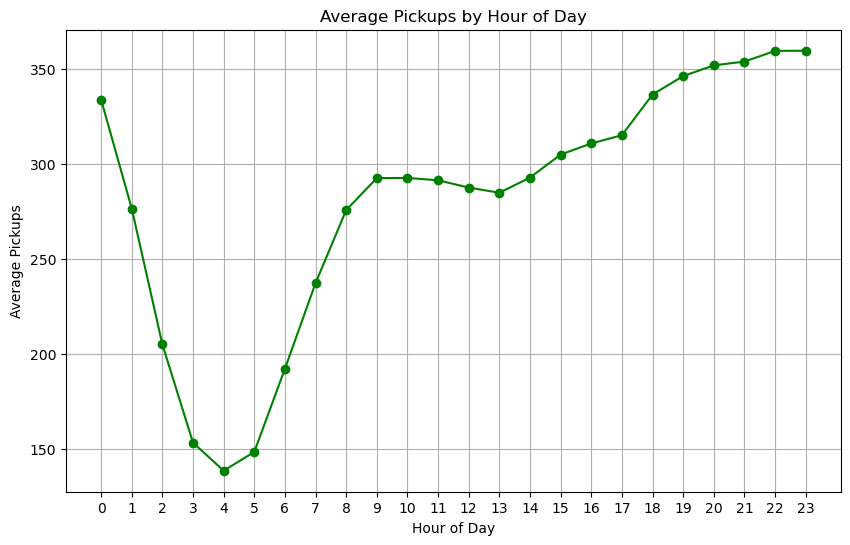

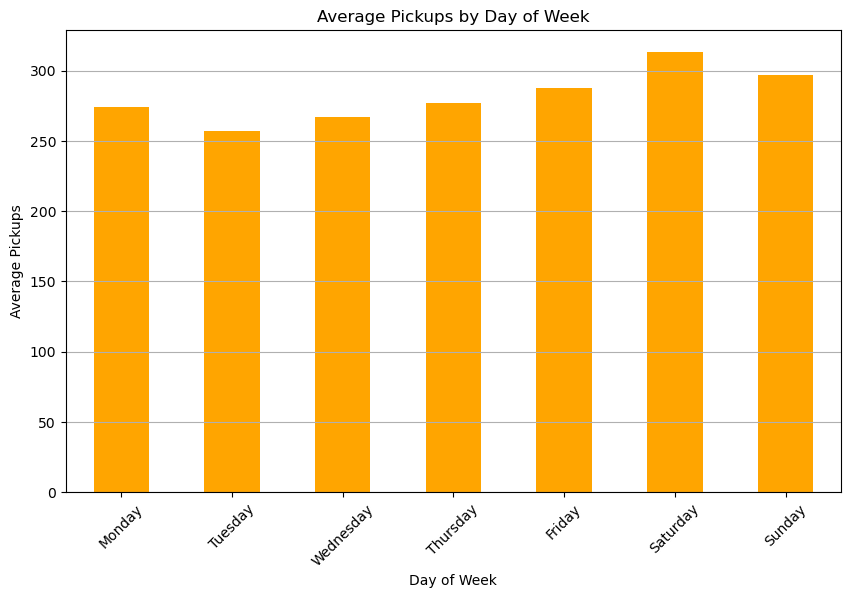

In [110]:
data['pickup_hour'] = pd.to_datetime(data['pickup_dt']).dt.hour

average_pickups_by_hour = data.groupby('pickup_hour')['pickups'].mean()

# Plotting average pickups by hour of day
plt.figure(figsize=(10, 6))
average_pickups_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Average Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.xticks(range(24))
plt.show()

# Example: Analyze low-demand periods by day of week
data['pickup_day'] = pd.to_datetime(data['pickup_dt']).dt.day_name()

average_pickups_by_day = data.groupby('pickup_day')['pickups'].mean()

# Plotting average pickups by day of week
plt.figure(figsize=(10, 6))
average_pickups_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='orange')
plt.title('Average Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()